In [2]:
!pip3 install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 2041.3 MB 12 kB/s s eta 0:00:011  |▉                               | 51.9 MB 77.6 MB/s eta 0:00:26     |█▌                              | 93.0 MB 2.8 MB/s eta 0:11:34     |█▌                              | 98.7 MB 90.4 MB/s eta 0:00:22     |██████▏                         | 394.4 MB 24.2 MB/s eta 0:01:09     |████████▋                       | 549.5 MB 14.6 MB/s eta 0:01:42     |█████████▌                      | 604.3 MB 21.8 MB/s eta 0:01:07     |██████████▊                     | 684.6 MB 10.8 MB/s eta 0:02:06     |████████████▌                   | 799.8 MB 28.7 MB/s eta 0:00:44     |████████████▊                   | 809.6 MB 28.7 MB/s eta 0:00:43     |██████████████▎                 | 912.2 MB 22.6 MB/s eta 0:00:50     |███████████████▉                | 1008.2 MB 6.5 MB/s eta 0:02:39     |████████████████▎               | 1037.8 MB 25.9 MB/s eta 0:00:39     |█████████████████  

In [1]:
!pip install nuscenes-devkit

     |████████████████████████████████| 283 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 24.5 MB/s eta 0:00:01
     |████████████████████████████████| 51.0 MB 35.2 MB/s eta 0:00:01    |▌                               | 829 kB 35.2 MB/s eta 0:00:02
     |████████████████████████████████| 25.9 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 1.7 MB/s eta 0:00:01
  Using cached Cython-0.29.23-cp36-cp36m-manylinux1_x86_64.whl (2.0 MB)
     |████████████████████████████████| 303 kB 95.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 36.8 MB/s eta 0:00:01
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=265624 sh

In [3]:
# Fix error : libGL.so.1: cannot open shared object file: No such file or directory
!apt-get update
!apt install -y libgl1-mesa-glx

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [506 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2188 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2657 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [33.5 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1418 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/u

In [1]:
CURRENT_PATH = './'

In [2]:
import subprocess

def unzipFile(pathToZip, pathToOut):
    unzip = ['unzip', '-o', pathToZip, '-d', pathToOut]
    p = subprocess.call(unzip)

unzipFile(f'./DatasetLight.zip', CURRENT_PATH)

### Load dataset from build-in split

In [3]:
from nuscenes import NuScenes
from nuscenes.prediction import PredictHelper
from nuscenes.eval.prediction.splits import get_prediction_challenge_split

import matplotlib.pyplot as plt

# This is the path where you stored your copy of the nuScenes dataset.
DATAROOT = './Dataset/'

history_length = 2
prediction_length = 6

# Use v1.0-trainval or v1.0-mini
nusc = NuScenes('v1.0-trainval', dataroot=DATAROOT, verbose=False)
helper = PredictHelper(nusc)

Here present car's only

In [4]:
train = get_prediction_challenge_split("train", dataroot=DATAROOT)
validation = get_prediction_challenge_split("train_val", dataroot=DATAROOT)
test = get_prediction_challenge_split("val", dataroot=DATAROOT)

In [5]:
# train = train[:1600]
# validation = validation[:1200]
# test = test[:3100]

In [6]:
print(f"Split: {len(train)} {len(validation)} {len(test)}")

Split: 32186 8560 9041


### Load dataset from custom split

In [7]:
import json

with open("./CustomDataSplit/motobikes.json", "r") as read_file:
    motobikes = json.load(read_file)
    
with open("./CustomDataSplit/peds.json", "r") as read_file:
    peds = json.load(read_file)

In [8]:
print(f"Split: {len(motobikes)} {len(peds)}")

Split: 1060 5686


### Data generator

In [6]:
from nuscenes.prediction.input_representation.static_layers import StaticLayerRasterizer
from nuscenes.prediction.input_representation.agents import AgentBoxesWithFadedHistory
from nuscenes.prediction.input_representation.interface import InputRepresentation
from nuscenes.prediction.input_representation.combinators import Rasterizer

# Input representation
def GenerateImage(instance_token, sample_token):
    static_layer_rasterizer = StaticLayerRasterizer(helper)
    agent_rasterizer = AgentBoxesWithFadedHistory(helper, seconds_of_history=1)

    mtp_input_representation = InputRepresentation(static_layer_rasterizer, agent_rasterizer, Rasterizer())

    img = mtp_input_representation.make_input_representation(instance_token, sample_token)

    return img


target_instance_token, start_prediction_sample_token = peds[1550].split("_")

img = GenerateImage(target_instance_token, start_prediction_sample_token)
plt.imshow(img)
plt.show()

print(len(img), len(img[0]), len(img[0][0]))

NameError: name 'peds' is not defined

In [10]:
import numpy as np
import torch

# NaN Values processing
def agent_param_processing(value):
    if np.isnan(value):
        return -1
    return value

vel = helper.get_velocity_for_agent(target_instance_token, start_prediction_sample_token)
vel = agent_param_processing(vel)

accel = helper.get_acceleration_for_agent(target_instance_token, start_prediction_sample_token)
accel = agent_param_processing(accel)

heading_cr = helper.get_heading_change_rate_for_agent(target_instance_token, start_prediction_sample_token)
heading_cr = agent_param_processing(heading_cr)

agent_state_vector = torch.Tensor([vel, accel, heading_cr])
agent_state_vector

tensor([ 1.4997, -0.0046, -0.0027])

In [8]:
import matplotlib.pyplot as plt

def PlotPathWithPrediction(future, predict=[]):
    plt.figure(figsize=(6, 6))

    plt.scatter(future[:, 1], -future[:, 0], c='orange', s=10)
    
    if len(predict) > 0:
        plt.scatter(predict[:, 1], -predict[:, 0], c='g', s=10)

    # Keep aspect ratio of axis
    plt.axis('equal')
    plt.show()


gt = helper.get_future_for_agent(target_instance_token, start_prediction_sample_token, prediction_length, in_agent_frame=True)
    
PlotPathWithPrediction(gt)

NameError: name 'helper' is not defined

Make cycle for small amout of data. Creating dataframe

In [12]:
import numpy as np
from enum import Enum

np.set_printoptions(threshold=500*500*3)

class DatasetColumns(Enum):
    FEATURES = 1
    STATES = 2
    LABELS = 3
    
# NaN Values processing
def agent_param_processing(value):
    if np.isnan(value):
        return -1
    return value

In [13]:
from tqdm import tqdm

#NPY_DATAROOT = './NpyDataset/'
NPY_DATAROOT = './'

def ConvertBatchToNpy(data, filename, dataToConvert, batch_indx=''):
    
    if dataToConvert == DatasetColumns.FEATURES:
        dataset_to_npy = np.empty([len(data), 500*500*3], dtype=np.uint8)
    
    if dataToConvert == DatasetColumns.STATES:
        dataset_to_npy = np.empty([len(data), 3])

    if dataToConvert == DatasetColumns.LABELS:
        dataset_to_npy = np.empty([len(data), 2*2*prediction_length])
    
    for i, x in enumerate(tqdm(dataset_to_npy)):
        instance_token, sample_token = data[i].split("_")
        
        if dataToConvert == DatasetColumns.FEATURES:
            # Take x
            img = GenerateImage(instance_token, sample_token)
            row = img.flatten()
            
        if dataToConvert == DatasetColumns.STATES:
            
            vel = helper.get_velocity_for_agent(instance_token, sample_token)
            vel = agent_param_processing(vel)

            accel = helper.get_acceleration_for_agent(instance_token, sample_token)
            accel = agent_param_processing(accel)

            heading_cr = helper.get_heading_change_rate_for_agent(instance_token, sample_token)
            heading_cr = agent_param_processing(heading_cr)
                
            row = np.array([vel, accel, heading_cr])
        
        if dataToConvert == DatasetColumns.LABELS:
            # Take y
            gt = helper.get_future_for_agent(instance_token, sample_token, prediction_length, in_agent_frame=True)
            row = gt.flatten()
            
        dataset_to_npy[i] = row
        
    np.save(f"{NPY_DATAROOT}{filename}_{batch_indx}.npy", dataset_to_npy)

In [14]:
# Сохраняет по батчам
batch_size = 256

def NpySamplesSaver(data, filename, dataToConvert):
    for i in range(int(len(data) / batch_size) + 1):
        
        from_sample = i * batch_size
        to_sample = min((i + 1) * batch_size, len(data))
        
        print(f"[{i}]{from_sample}:{to_sample}")
        
        batch = data[from_sample : to_sample]
        ConvertBatchToNpy(batch, filename, dataToConvert, i)

Train

In [9]:
#amount_of_rows = 5000

In [19]:
NpySamplesSaver(peds, 'multiagent_peds', DatasetColumns.FEATURES)

[0]0:256


100%|██████████| 256/256 [03:35<00:00,  1.19it/s]


[1]256:512


100%|██████████| 256/256 [03:37<00:00,  1.18it/s]


[2]512:768


100%|██████████| 256/256 [03:34<00:00,  1.20it/s]


[3]768:1024


100%|██████████| 256/256 [03:37<00:00,  1.18it/s]


[4]1024:1280


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[5]1280:1536


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[6]1536:1792


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[7]1792:2048


100%|██████████| 256/256 [03:34<00:00,  1.20it/s]


[8]2048:2304


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[9]2304:2560


100%|██████████| 256/256 [03:34<00:00,  1.19it/s]


[10]2560:2816


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[11]2816:3072


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[12]3072:3328


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[13]3328:3584


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[14]3584:3840


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[15]3840:4096


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[16]4096:4352


100%|██████████| 256/256 [03:34<00:00,  1.20it/s]


[17]4352:4608


100%|██████████| 256/256 [03:34<00:00,  1.20it/s]


[18]4608:4864


100%|██████████| 256/256 [03:37<00:00,  1.18it/s]


[19]4864:5120


100%|██████████| 256/256 [03:35<00:00,  1.19it/s]


[20]5120:5376


100%|██████████| 256/256 [03:37<00:00,  1.18it/s]


[21]5376:5632


100%|██████████| 256/256 [03:33<00:00,  1.20it/s]


[22]5632:5686


100%|██████████| 54/54 [00:44<00:00,  1.21it/s]


In [15]:
NpySamplesSaver(motobikes, 'multiagent_moto', DatasetColumns.FEATURES)

[0]0:256


100%|██████████| 256/256 [03:29<00:00,  1.22it/s]


[1]256:512


100%|██████████| 256/256 [03:29<00:00,  1.22it/s]


[2]512:768


100%|██████████| 256/256 [03:29<00:00,  1.22it/s]


[3]768:1024


100%|██████████| 256/256 [03:30<00:00,  1.22it/s]


[4]1024:1060


100%|██████████| 36/36 [00:29<00:00,  1.23it/s]


In [19]:
ConvertBatchToNpy(train[:amount_of_rows], 'multiagent_train_states_5k', DatasetColumns.STATES)

100%|██████████| 5000/5000 [00:01<00:00, 2959.19it/s]


In [20]:
ConvertBatchToNpy(train[:amount_of_rows], 'multiagent_train_labels_5k', DatasetColumns.LABELS)

100%|██████████| 5000/5000 [00:00<00:00, 5433.58it/s]


Validation

In [12]:
#amount_of_rows = 5000

In [15]:
#NpySamplesSaver(validation, 'multiagent_bikes_1200', DatasetColumns.FEATURES)

In [38]:
ConvertBatchToNpy(validation[:amount_of_rows], 'multiagent_validation_states_2k', DatasetColumns.STATES)

100%|██████████| 2000/2000 [00:00<00:00, 9191.83it/s]


In [39]:
ConvertBatchToNpy(validation[:amount_of_rows], 'multiagent_validation_labels_2k', DatasetColumns.LABELS)

100%|██████████| 2000/2000 [00:00<00:00, 11307.43it/s]


Test

In [16]:
#amount_of_rows = 5000

In [16]:
#NpySamplesSaver(test, 'multiagent_peds_3100', DatasetColumns.FEATURES)

In [40]:
ConvertBatchToNpy(test[:amount_of_rows], 'multiagent_test_states_2k', DatasetColumns.STATES)

100%|██████████| 2000/2000 [00:00<00:00, 5221.71it/s]


In [41]:
ConvertBatchToNpy(test[:amount_of_rows], 'multiagent_test_labels_2k', DatasetColumns.LABELS)

100%|██████████| 2000/2000 [00:00<00:00, 9251.91it/s] 


### Add files to zip

In [16]:
from zipfile import ZipFile

In [20]:
import shutil
shutil.make_archive("multiagent_peds", 'zip', './Archive')

'/root/multiagent_peds.zip'

### Try to read data and check

In [1]:
NPY_DATAROOT = './NpyDataset/'

In [39]:
import numpy as np

loaded_img = np.load(f'{NPY_DATAROOT}Multiagent/multiagent_validation_features_6k.npy')
loaded_states = np.load(f'{NPY_DATAROOT}Multiagent/multiagent_validation_states_6k.npy')
loaded_labels = np.load(f'{NPY_DATAROOT}Multiagent/multiagent_validation_labels_6k.npy')

In [40]:
len(loaded_img), len(loaded_states), len(loaded_labels)

(6200, 6200, 6200)

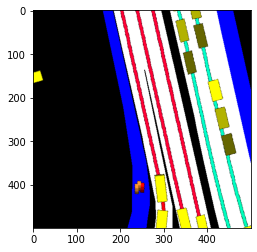

In [41]:
import matplotlib.pyplot as plt

index_to_check = 5170

img = loaded_img[index_to_check]
img = img.reshape((500, 500, 3))

plt.imshow(img)
plt.show()

In [42]:
state = loaded_states[index_to_check]
state

array([ 1.18795496, -0.0048155 ,  0.04409851])

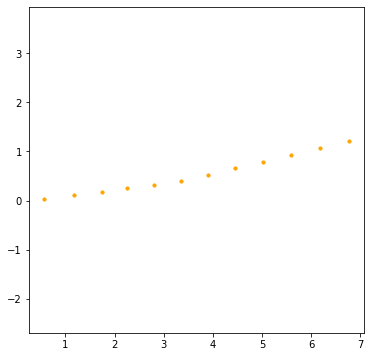

In [43]:
gt = loaded_labels[index_to_check]
gt = gt.reshape((12, 2))

PlotPathWithPrediction(gt)

In [44]:
import math

for state in img:
    for val in state:
        #print(val)
        for channel in val:
            #print(channel)
            #if val == -1:
            if math.isnan(channel):
                print("ERROR!")

### Try generate dataset with GPU acceleration

In [ ]:
import torch

print(torch.cuda.is_available())

device0 = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on ', device)
print(f"Device count: {torch.cuda.device_count()}")

In [ ]:
from tqdm import tqdm

NPY_DATAROOT = './NpyDataset/'


def ConvertSamplesToNpyTensors(data, filename):
    
    dataset_to_npy = np.empty([len(data), 500*500*3], dtype=np.uint8)
    dataset_to_npy = torch.from_numpy(dataset_to_npy).to(device0)
    
    for i, x in enumerate(tqdm(dataset_to_npy)):
        instance_token, sample_token = data[i].split("_")
        
        # Take x
        img = GenerateImage(instance_token, sample_token)
        row = img.flatten()
        row = torch.tensor(row).to(device0)

        dataset_to_npy[i] = row
     
    torch.save(dataset_to_npy, f"{NPY_DATAROOT}{filename}")

In [32]:
loaded_tesnor = torch.load(f"{NPY_DATAROOT}{'img_tensor.pt'}")

In [34]:
loaded_tesnor.size()

torch.Size([2000, 750000])

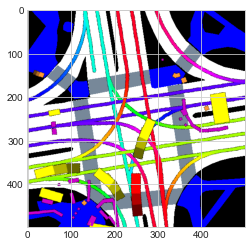

In [38]:
img = loaded_tesnor[29].reshape((500, 500, 3)).cpu().numpy()

plt.imshow(img)
plt.show()